# CEE 4530 Prelim 2020

Name:___________________

This prelim is open book and open internet. You **are** allowed to discuss the questions and related concepts with anyone while you are taking this prelim. You are not allowed to post questions on discussion boards. If you have questions, send an email to Monroe (monroews@gmail.com). If the question is relevant for the whole class he will post it on the Canvas discussion board.

For each question make sure to use units and to give variables names that are easily understood. Use print statements to **print the answers in a sentence** (except for the multiple choice!).

Download your file as an ipynb and name it "yournamePrelim.ipynb" (10 points for this!)
Turn your prelim in to Canvas as an assignment.

Each question is worth 5 points.

# ABET
PI 6b: Students analyze data to draw conclusions. 

* photometer calibration

PI 6c: Students demonstrate both quantitative judgment and engineering judgment*.

* photometer (eliminate data that is out of the range of the sensor)



In [1]:
!pip install aguaclara

     |████████████████████████████████| 92kB 2.9MB/s 
     |████████████████████████████████| 163kB 7.9MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.0-cp36-none-any.whl size=99623 sha256=afef4c2f124eaee98e3cdcbd2c0fe3643b9fada7391c1263ab917342a94612d5
  Stored in directory: /root/.cache/pip/wheels/34/e9/34/0d3722243083a982623290c205c14a08b54ed290ee29219fd2
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134156 sha256=adfdd084d30998c3b4840c588a4a0f2d3bf8ced5653e53d760ee27308d53dcfc
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint


In [0]:
import aguaclara as ac
from aguaclara.core.units import unit_registry as u
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize

## Design a sand column experiment.
A sand filter column has an inner diameter of 1 inch and 50 cm total internal height. The sand depth in the column is 30 cm. The sand porosity is 0.4 (40% of the sand bed is filled with water, 60% is filled with sand). The sand density is $2650 kg/m^3$. The target approach velocity (the velocity of the water in the column if there were no sand) is 1.8 mm/s. The water is pumped with a peristaltic pump that delivers 2.8 mL per revolution.


1. What is the mass of sand (in grams) that must be added to the column?
2. The dry sand is poured into the empty column. Should the column be filled with water in upflow or downflow? Explain why!
3. What flow rate (in mL/s) is required?
4. What should the pump revolutions per minute be in rev/min? (Note that rev is a unit!)
5. What is the hydraulic residence time of the water in the column (in seconds) including both the residence time in the sand bed and the residence time in the water above the sand bed?
             

In [3]:
D = 1 * u.inch
A = np.pi * D**2/4
Va = 1.8 * u.mm/u.s
H_column = 50 * u.cm
H_sand = 30 * u.cm
Sand_porosity = 0.4
Sand_density = 2650 * u.kg/u.m**3
Pump_flow_per_rev = 2.8 * u.mL/u.rev

Sand_M = (Sand_porosity * Sand_density * H_sand * A).to(u.g)
print('1) The sand mass is',Sand_M)

print('2) The column must be filled in upflow mode so that the water can displace the air and drive the air out of the top of the column.')
Q = (A*Va).to(u.mL/u.s)
print('3) The flow rate is',Q)

Pump_speed = (Q/Pump_flow_per_rev).to(u.rpm)
print('4) The pump rpm should be set to',Pump_speed)

HRT = ((H_sand*Sand_porosity + (H_column-H_sand)) * A/Q).to(u.s)
print('5) The total hydraulic residence time in the column is',HRT)

1) The sand mass is 161.1 gram
2) The column must be filled in upflow mode so that the water can displace the air and drive the air out of the top of the column.
3) The flow rate is 0.9121 milliliter / second
4) The pump rpm should be set to 19.54 revolutions_per_minute
5) The total hydraulic residence time in the column is 177.8 second


## Acid Neutralizing Capacity

A 52 mL water sample that contains some carbonates is titrated with 0.05 N HCl. The equivalent volume of the titrant was 2.5 mL.

6. What was the ANC of the sample (in meq/L)?

In [4]:
Sample_V = 52 * u.mL
Titrant_N = 0.05 * u.eq/u.L
Sample_V_e = 2.5 * u.mL
Sample_ANC = (Titrant_N * Sample_V_e/Sample_V).to(u.meq/u.L)
print('6) The sample ANC is',Sample_ANC)

6) The sample ANC is 2.404 milliequivalent / liter


## Photometer calibration
The photometer that we use in lab measures absorbance using the following equation.

$$A = -log \frac{V_{Sample} - V_{Dark}}{V_{Blank} - V_{Dark}}$$

where $log_{10}$ is log base 10.

The relationship between concentration of a dissolved species and the absorbance will follow Beer's law.

$$ A = \epsilon b C + intercept $$

where $\epsilon$ is the extinction coefficient that is a property of the chemical species and where $intercept$ is zero.

The optical path length for the photometer is 19 mm. The raw voltage data for dark voltage, blank voltage, standards, and unknown are given below.

7. Use [stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) to obtain the best fit line for the calibration with *absorbance as a function of concentration*. (No additional response needed for this number.)
8. Plot the calibration data AND the best fit line (use both slope and intercept to draw this line) showing absorbance as a function of concentration (note that that ProCoDA shows this plot with the axis flipped). Make sure to label the axis and include a legend. And make sure that you have the same units on both plots!
9. What is the correlation coefficient (r value) for the linear fit?
10. Why does this data not follow Beer's law? Identify which data points do not follow Beer's law and explain the problem with those data points.

11. Eliminate the data points that do not follow Beer's law. You can simply copy the raw data and then delete the data doesn't follow Beer's law. You don't need to write an algorithm for this step.  (No additional response needed for this number.)
12. Use [stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) to obtain the best fit line for the data that is within the measurement range of the photometer. (No additional response needed for this number.) 
13. What is $\epsilon$? Make sure to simplify the units to $length^2/mass$. (Make sure to attach the correct units after doing the linear regression! Note that you can now ignore the intercept because it is almost zero!)
14. Create a function in python that returns the concentration given a sample voltage. You can derive this equation from the two equations above.( No additional response needed for this number.)
15. What is the absorbance of the unknown?
16. What is the concentration of the unknown?
17. Plot the calibration data, the best fit line (use only the slope to draw this line) showing absorbance as a function of concentration, and the unknown sample. Make sure to label the axis and include a legend. And make sure that you have the same units on both plots!

[-0.          0.4119488   0.83965677  1.26430819  1.95087259  2.32735848
  2.7817617   2.99050071  2.99316238]


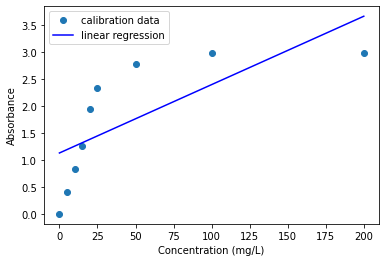

9) The correlation coefficient, r is 0.7216510436837159
10) This data doesn't fit Beer's law because the amount of light getting to the photometer was below its detection limit for the 3 highest concentrations.


In [14]:
Dark_Volts = -1.3065 * u.V
Blank_Volts = 3.49727 * u.V
Unknown_Volts = 0.10632 * u.V
Sample_C = np.array([0, 5, 10, 15, 20, 25, 50, 100, 200])* u.mg/u.L
Sample_Volts = np.array([3.497270,0.554016,-0.611595,-1.045119,-1.252709,-1.283894, -1.29856, -1.30159, -1.30162])* u.volts

def Absorbance(Sample_Volts):
  Sample_A = -np.log10((Sample_Volts - Dark_Volts)/(Blank_Volts - Dark_Volts))
  return(Sample_A)

Sample_A = Absorbance(Sample_Volts)

slope, intercept, r_value, p_value, std_err = stats.linregress(Sample_C,Sample_A)

def A_Model(Sample_C):
  A = Sample_C * slope + intercept
  return A

plt.plot(Sample_C,Sample_A,'o');
plt.plot(Sample_C,A_Model(Sample_C),'b-');
plt.legend(['calibration data','linear regression']);
plt.ylabel('Absorbance');
plt.xlabel('Concentration (mg/L)');
plt.show()

print('9) The correlation coefficient, r is',r_value)
print('10) This data doesn\'t fit Beer\'s law because the amount of light getting to the photometer was below its detection limit for the 3 highest concentrations.')

13) The extinction coefficient is 5.016 meter ** 2 / gram
15) The absorbance of the unknown is 0.5314953714297601
16) The concentration of the unknown is 5.577 milligram / liter


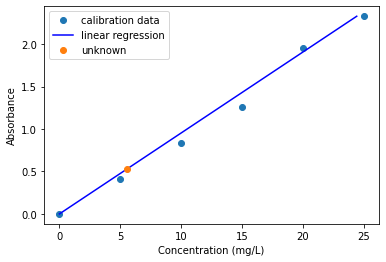

In [15]:
# 11) eliminate data that is outside the detection limit.

Sample_C = np.array([0, 5, 10, 15, 20, 25])* u.mg/u.L
Sample_Volts = np.array([3.497270,0.554016,-0.611595,-1.045119,-1.252709,-1.283894])* u.volts
Sample_A = Absorbance(Sample_Volts)

# 12) linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(Sample_C,Sample_A)

slope = slope / (u.mg/u.L)
extinction_coefficient = (slope/b).to(u.m**2/u.g)
print('13) The extinction coefficient is', extinction_coefficient)

# 14) concentration given sample volts
def C_Model(Sample_Volts):
  C = -np.log10((Sample_Volts - Dark_Volts)/(Blank_Volts - Dark_Volts)) /extinction_coefficient/b
  return C.to(u.mg/u.L)

print('15) The absorbance of the unknown is',Absorbance(Unknown_Volts))
print('16) The concentration of the unknown is',C_Model(Unknown_Volts))

#17 plot of the calibration data that is in the detector range.
plt.plot(Sample_C,Sample_A,'o');
plt.plot(C_Model(Sample_Volts),Sample_A,'b-');
plt.plot(C_Model(Unknown_Volts),Absorbance(Unknown_Volts),'o')
plt.legend(['calibration data','linear regression','unknown']);
plt.ylabel('Absorbance');
plt.xlabel('Concentration (mg/L)');
plt.show()



17. A peristaltic pump is pumping a red dye solution from a tank on the floor through a column filled with sand and activated carbon with flow down through the column. The pump is on the laboratory bench and the column is held by clamps to a stand that is on the bench. The tube that exits from the bottom of the sand column is elevated and discharges to the atmosphere (it drips into the sink) at an elevation that is higher than the tubing entering the top of the sand column. There are air bubbles entering the sand column. Which explanation(s) for the source of the air bubbles is (are) consistent with the observed results? Use what you've learned in fluid mechanics to help guide your analysis.

    A) Sand column fittings at the top of the column are leaking.

    B) Sand column fittings at the bottom of the column are leaking.

    C) *Instant tube fitting (push to connect fitting) between the tank and the pump is leaking.*

    D) Instant tube fitting between the pump and the sand column is leaking.

    E) *The tank of red dye is nearly empty and the pump is beginning to pull air into the end of the inlet tube.*

18. ProCoDA is reporting a concentration of 10 mg/L of red dye with a calibrated photometer when students are pumping reverse osmosis water through the photometer. What might be causing the high readings? Which of the following explanations is (are) consistent with the observed results?

     A) *An air bubble is caught in the optical path of the photometer*

     B) The photometer LED is turned off

     C) The photometer is installed backwards